In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array

In [2]:
from imblearn.over_sampling import SMOTE

In [3]:
hc_train=pd.read_csv('application_train.csv', index_col=False)
hc_test=pd.read_csv('application_test.csv', index_col=False)

In [4]:
hc_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
hc_train.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [5]:
hc_train['NAME_TYPE_SUITE'].head(5)

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [8]:
hc_train['OCCUPATION_TYPE'].mode

0    Laborers
dtype: object

In [6]:
#select columns
hc_train3=hc_train[['SK_ID_CURR', 'TARGET','NAME_CONTRACT_TYPE','CODE_GENDER', 'FLAG_OWN_CAR','CNT_CHILDREN', 'AMT_INCOME_TOTAL',
                    'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                   'DAYS_BIRTH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]

In [7]:
#Rename Columns name
hc_train3.columns=['SK_ID_CURR', 'label', 'CONTRACT_TYPE', 'GENDER', 'FLAG_OWN_CAR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                  'AMT_ANNUITY','INCOME_TYPE', 'EDUCATION', 'MARRIAGE', 'HOUSING_TYPE', 'DAYS_BIRTH', 'OCCUPATION', 
                   'CNT_FAM_MEMBERS', 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']

In [8]:
hc_train3.head(5)

,SK_ID_CURR,label,CONTRACT_TYPE,GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,INCOME_TYPE,EDUCATION,MARRIAGE,HOUSING_TYPE,DAYS_BIRTH,OCCUPATION,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,1,Cash loans,M,N,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,Laborers,1.0,0.083037,0.262949,0.139376
1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,-16765,Core staff,2.0,0.311267,0.622246,NaN
2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,Laborers,1.0,NaN,0.555912,0.729567
3,100006,0,Cash loans,F,N,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,Laborers,2.0,NaN,0.650442,NaN
4,100007,0,Cash loans,M,N,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,Core staff,1.0,NaN,0.322738,NaN


Check Missing Value

In [9]:
hc_train3.isnull().sum()

SK_ID_CURR               0
label                    0
CONTRACT_TYPE            0
GENDER                   0
FLAG_OWN_CAR             0
CNT_CHILDREN             0
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
AMT_ANNUITY             12
INCOME_TYPE              0
EDUCATION                0
MARRIAGE                 0
HOUSING_TYPE             0
DAYS_BIRTH               0
OCCUPATION           96391
CNT_FAM_MEMBERS          2
EXT_SOURCE_1        173378
EXT_SOURCE_2           660
EXT_SOURCE_3         60965
dtype: int64

In [10]:
#calculate AMT_ANNUITY mean
annuity_avg= hc_train3['AMT_ANNUITY'].mean()
print(annuity_avg)

#Fill na in AMT_ANNUITY with annuity_avg
hc_train3['AMT_ANNUITY'].fillna(annuity_avg, inplace=True)



27108.573909183444


C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [11]:
#check mode accupation
mode_acc=hc_train3['OCCUPATION'].mode()
mode_acc

#Fill na in OCCUPATION with mode_acc

hc_train3['OCCUPATION'].fillna('Laborers', inplace=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


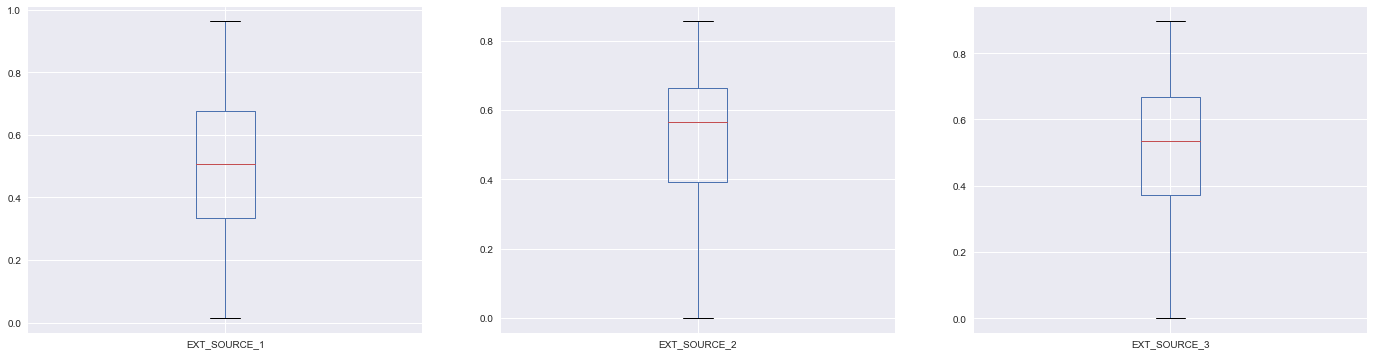

In [12]:
#check outlier in variable EXT_SOURCE1, EXT_SOURCE2, EXT_SOURCE3

plt.figure(figsize=(24,6))
plt.subplot(131)
hc_train3[['EXT_SOURCE_1']].boxplot(sym='b+', grid=True)
plt.subplot(132)
hc_train3[['EXT_SOURCE_2']].boxplot(sym='b+', grid=True)
plt.subplot(133)
hc_train3[['EXT_SOURCE_3']].boxplot(sym='b+', grid=True)
plt.show()

In [13]:
#fill missing value in EXT_SOURCE 1,2,3 with ffill method.
#fill missing value in EXT_SOURCE1
hc_train3['EXT_SOURCE_1'].fillna(method='ffill', inplace=True)
hc_train3['EXT_SOURCE_2'].fillna(method='ffill', inplace=True)
hc_train3['EXT_SOURCE_3'].fillna(method='ffill', inplace=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


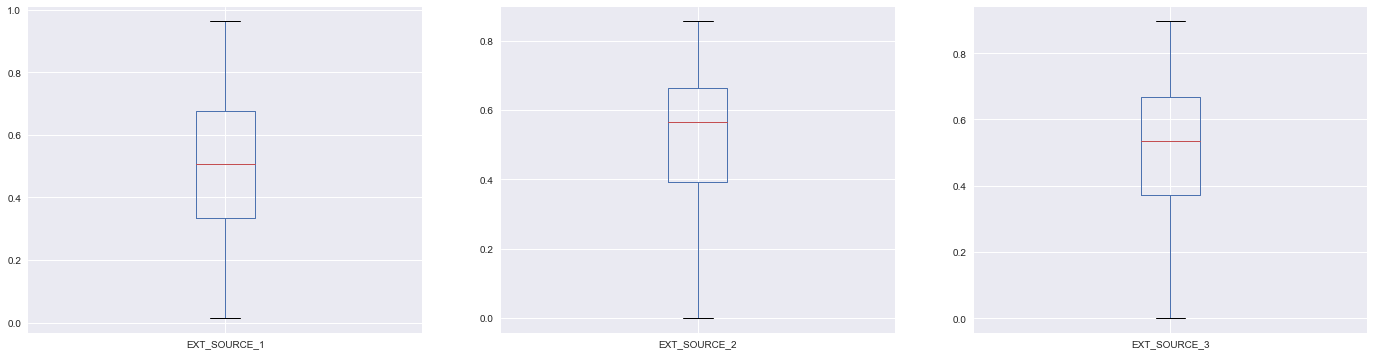

In [14]:
#check outlier in variable EXT_SOURCE1, EXT_SOURCE2, EXT_SOURCE3 after fill na

plt.figure(figsize=(24,6))
plt.subplot(131)
hc_train3[['EXT_SOURCE_1']].boxplot(sym='r*', grid=True)
plt.subplot(132)
hc_train3[['EXT_SOURCE_2']].boxplot(sym='r*', grid=True)
plt.subplot(133)
hc_train3[['EXT_SOURCE_3']].boxplot(sym='r*', grid=True)
plt.show()

In [15]:
#calculate CNT_FAM_MEMBERS mean
fam_avg= hc_train3['CNT_FAM_MEMBERS'].mean()
print(fam_avg)

#Fill na in CNT_FAM_MEMBERS with fam_avg
hc_train3['CNT_FAM_MEMBERS'].fillna(fam_avg, inplace=True)

2.152665450442101


C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [16]:
type(hc_train3)

pandas.core.frame.DataFrame

### Check distribution each variable

#### Categorical Variable

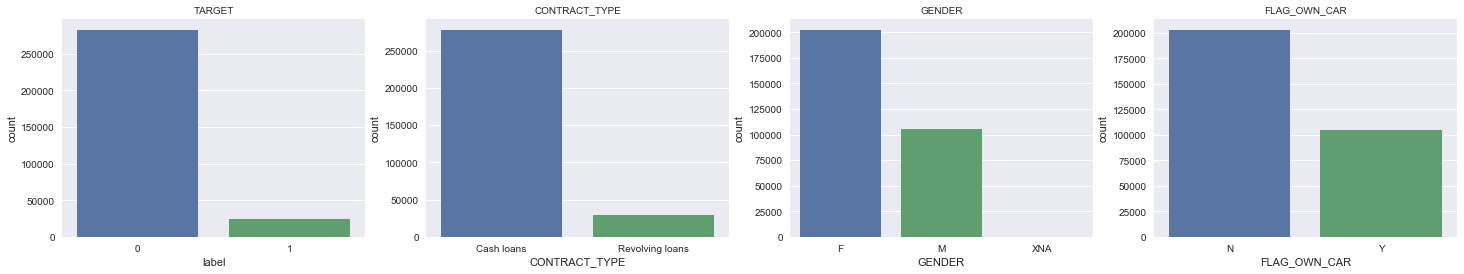

In [17]:
#Barchart for categorical variable
plt.figure(figsize=(25,4))
plt.subplot(141)
sns.countplot(x='label', data=hc_train3, order=hc_train3['label'].value_counts().index)
plt.title('TARGET', fontsize=10)
plt.subplot(142)
sns.countplot(x='CONTRACT_TYPE', data=hc_train3, order=hc_train3['CONTRACT_TYPE'].value_counts().index)
plt.title('CONTRACT_TYPE', fontsize=10)
plt.subplot(143)
sns.countplot(x='GENDER', data=hc_train3, order=hc_train3['GENDER'].value_counts().index)
plt.title('GENDER', fontsize=10)
plt.subplot(144)
sns.countplot(x='FLAG_OWN_CAR', data=hc_train3, order=hc_train3['FLAG_OWN_CAR'].value_counts().index)
plt.title('FLAG_OWN_CAR', fontsize=10)
plt.show()


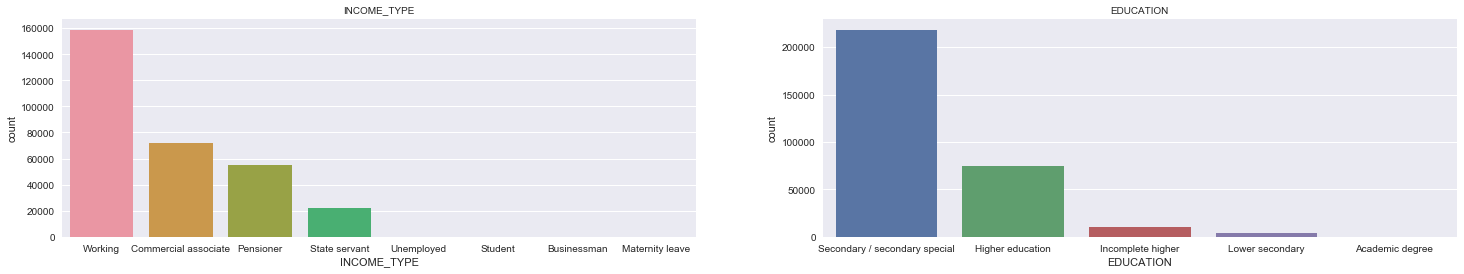

In [18]:
#Plot other variable categories
plt.figure(figsize=(25,4))
plt.subplot(121)
sns.countplot(x='INCOME_TYPE', data=hc_train3, order=hc_train3['INCOME_TYPE'].value_counts().index)
plt.title('INCOME_TYPE', fontsize=10)
plt.subplot(122)
sns.countplot(x='EDUCATION', data=hc_train3, order=hc_train3['EDUCATION'].value_counts().index)
plt.title('EDUCATION', fontsize=10)
plt.show()

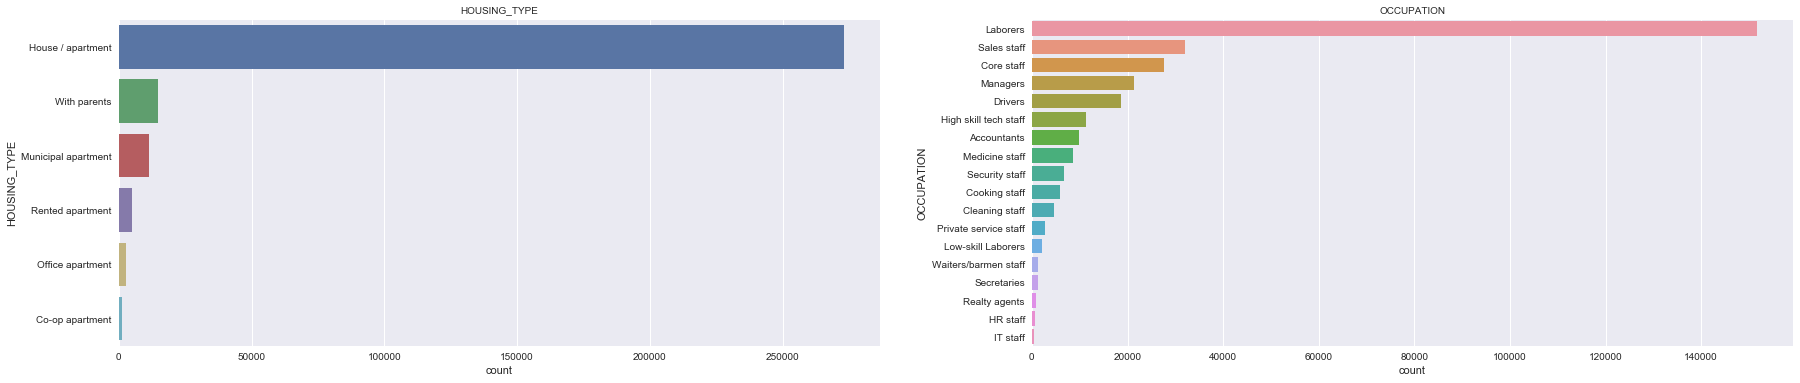

In [19]:
#Plot other variable categories
plt.figure(figsize=(30,6))
plt.subplot(121)
sns.countplot(y='HOUSING_TYPE', data=hc_train3, order=hc_train3['HOUSING_TYPE'].value_counts().index)
plt.title('HOUSING_TYPE', fontsize=10)
plt.subplot(122)
sns.countplot(y='OCCUPATION', data=hc_train3, order=hc_train3['OCCUPATION'].value_counts().index)
plt.title('OCCUPATION', fontsize=10)
plt.show()

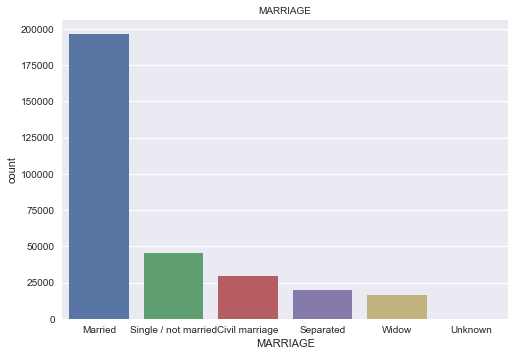

In [20]:
#Marraige plot
sns.countplot(x='MARRIAGE', data=hc_train3, order=hc_train3['MARRIAGE'].value_counts().index)
plt.title('MARRIAGE', fontsize=10)
plt.show()

#### Categorical variable VS label

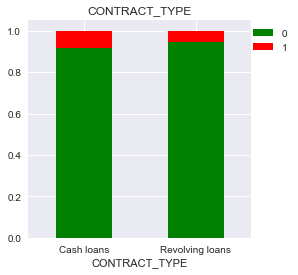

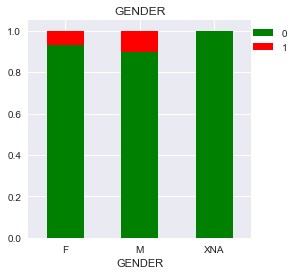

In [21]:
#plot how CONTRACT_TYPE vs label
pd.crosstab(hc_train3['CONTRACT_TYPE'], hc_train3['label'], normalize='index').plot.bar(rot=0, stacked=True, color=['green', 'red'], figsize=(4,4), title="CONTRACT_TYPE")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
#plot how GENDER vs label
pd.crosstab(hc_train3['GENDER'], hc_train3['label'], normalize='index').plot.bar(rot=0, stacked=True, color=['green', 'red'], figsize=(4,4), title="GENDER")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

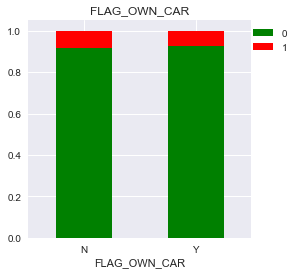

In [22]:
#plot how FLAG_OWN_CAR vs label
pd.crosstab(hc_train3['FLAG_OWN_CAR'], hc_train3['label'], normalize='index').plot.bar(rot=0, stacked=True, color=['green', 'red'], figsize=(4,4), title="FLAG_OWN_CAR")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

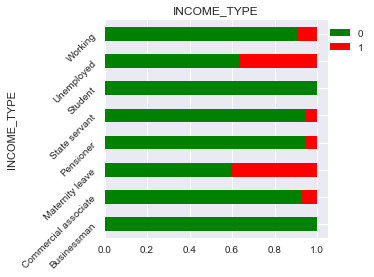

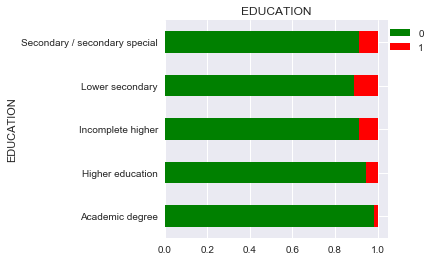

In [23]:
#plot how INCOME_TYPE vs label
pd.crosstab(hc_train3['INCOME_TYPE'], hc_train3['label'], normalize='index').plot.barh(rot=45, stacked=True, color=['green', 'red'], figsize=(4,4), title="INCOME_TYPE")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
#plot how EDUCATION vs label
pd.crosstab(hc_train3['EDUCATION'], hc_train3['label'], normalize='index').plot.barh(rot=0, stacked=True, color=['green', 'red'], figsize=(4,4), title="EDUCATION")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

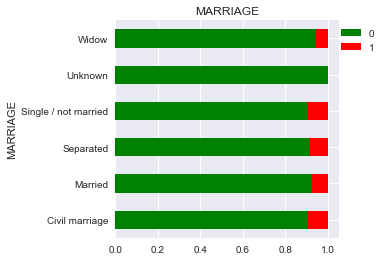

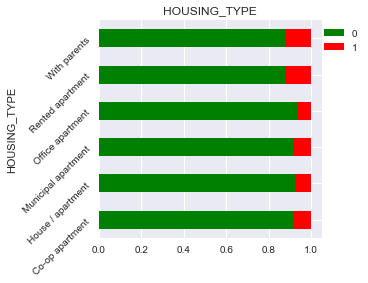

In [24]:
#plot how MARRIAGE vs label
pd.crosstab(hc_train3['MARRIAGE'], hc_train3['label'], normalize='index').plot.barh(rot=0, stacked=True, color=['green', 'red'], figsize=(4,4), title="MARRIAGE")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
#plot how HOUSING_TYPE vs label
pd.crosstab(hc_train3['HOUSING_TYPE'], hc_train3['label'], normalize='index').plot.barh(rot=45, stacked=True, color=['green', 'red'], figsize=(4,4), title="HOUSING_TYPE")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

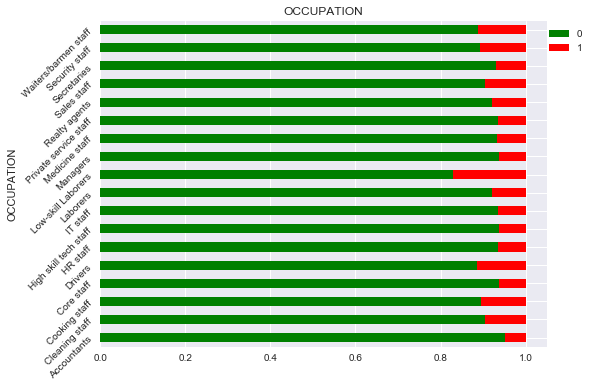

In [25]:
#plot how OCCUPATION vs label
pd.crosstab(hc_train3['OCCUPATION'], hc_train3['label'], normalize='index').plot.barh(rot=45, stacked=True, color=['green', 'red'], figsize=(8,6), title="OCCUPATION")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.show()

### Handling lowest categories

In [26]:
hc_train3['MARRIAGE'].replace('Unknown','Married', inplace=True)


C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [27]:
#replace lowest categories in EDUCATION variable with highest categories
hc_train3['EDUCATION'].replace('Lower secondary','Incomplete higher', inplace=True)
hc_train3['EDUCATION'].replace('Academic degree','Incomplete higher', inplace=True)

#replace lowest categories in INCOME_TYPE variable with highest categories
hc_train3['INCOME_TYPE'].replace('Unemployed','Pensioner', inplace=True)
hc_train3['INCOME_TYPE'].replace('Businessman','Working', inplace=True)
hc_train3['INCOME_TYPE'].replace('Maternity leave','Working', inplace=True)
hc_train3['INCOME_TYPE'].replace('Student','Working', inplace=True)

##replace lowest categories in GENDER variable with highest categories
hc_train3['GENDER'].replace('XNA','F', inplace=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [28]:
hc_train3.groupby('MARRIAGE')['SK_ID_CURR'].count()

MARRIAGE
Civil marriage           29775
Married                 196434
Separated                19770
Single / not married     45444
Widow                    16088
Name: SK_ID_CURR, dtype: int64

In [29]:
hc_train3.groupby('EDUCATION')['SK_ID_CURR'].count()

EDUCATION
Higher education                  74863
Incomplete higher                 14257
Secondary / secondary special    218391
Name: SK_ID_CURR, dtype: int64

In [30]:
hc_train3.groupby('INCOME_TYPE')['SK_ID_CURR'].count()

INCOME_TYPE
Commercial associate     71617
Pensioner                55384
State servant            21703
Working                 158807
Name: SK_ID_CURR, dtype: int64

In [31]:
hc_train3.groupby('GENDER')['SK_ID_CURR'].count()

GENDER
F    202452
M    105059
Name: SK_ID_CURR, dtype: int64

#### Numerical Variable

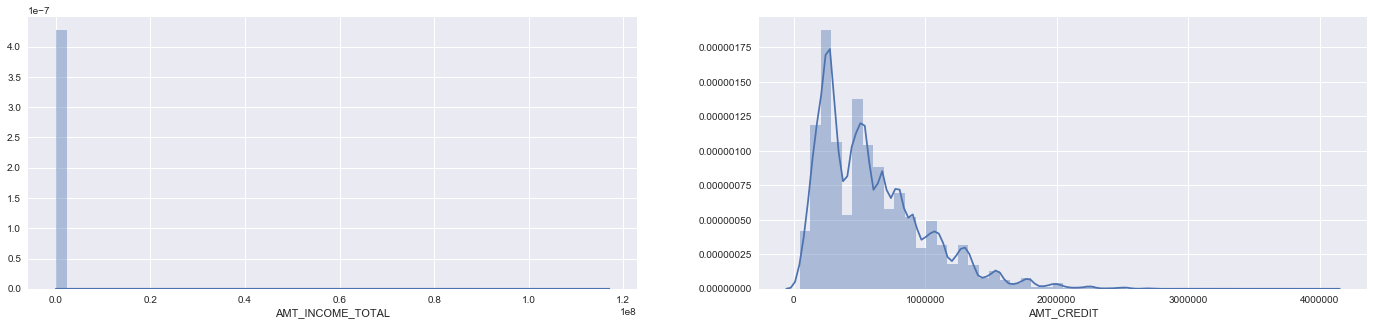

In [32]:
#density plot AMT_INCOME_TOTAL and AMT_CREDIT
plt.figure(figsize=(24,5))
plt.subplot(121)
sns.distplot(hc_train3['AMT_INCOME_TOTAL'])
plt.subplot(122)
sns.distplot(hc_train3['AMT_CREDIT'])
plt.show()

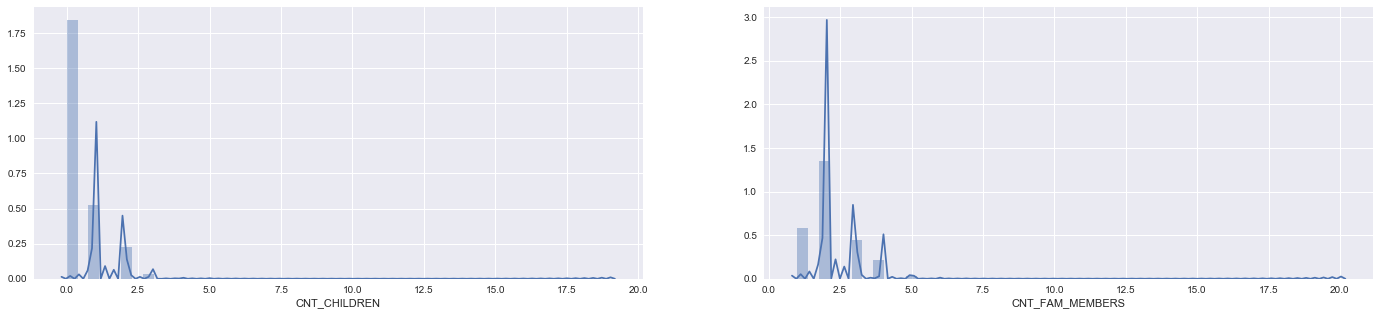

In [33]:
#density plot CNT_CHILDREN and CNT_FAM_MEMBERS
plt.figure(figsize=(24,5))
plt.subplot(121)
sns.distplot(hc_train3['CNT_CHILDREN'])
plt.subplot(122)
sns.distplot(hc_train3['CNT_FAM_MEMBERS'])
plt.show()

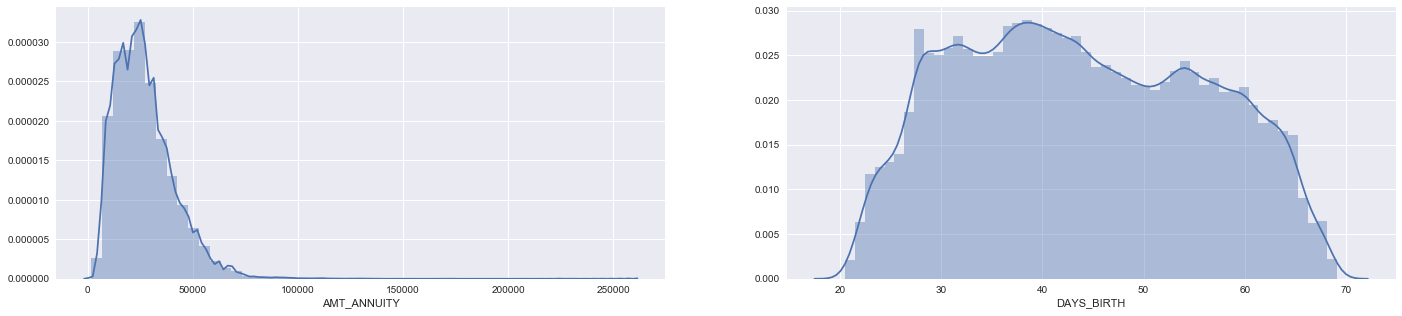

In [34]:
#density plot AMT_ANNUITY and DAYS_BIRTH
plt.figure(figsize=(24,5))
plt.subplot(121)
sns.distplot(hc_train3['AMT_ANNUITY'])
plt.subplot(122)
sns.distplot(hc_train3['DAYS_BIRTH']/-365)
plt.show()

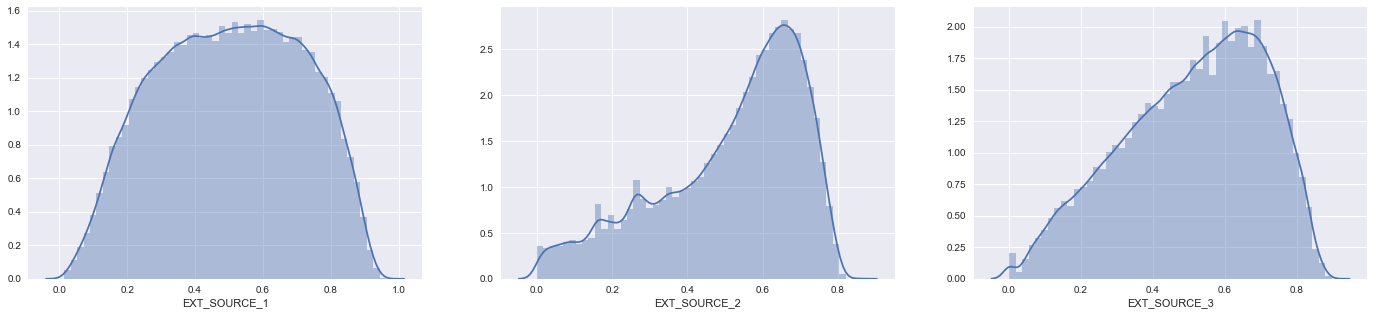

In [35]:
#density plotEXT_SOURCE_1,2,3
plt.figure(figsize=(24,5))
plt.subplot(131)
sns.distplot(hc_train3['EXT_SOURCE_1'])
plt.subplot(132)
sns.distplot(hc_train3['EXT_SOURCE_2'])
plt.subplot(133)
sns.distplot(hc_train3['EXT_SOURCE_3'])
plt.show()

#### Numerical Variable VS Label

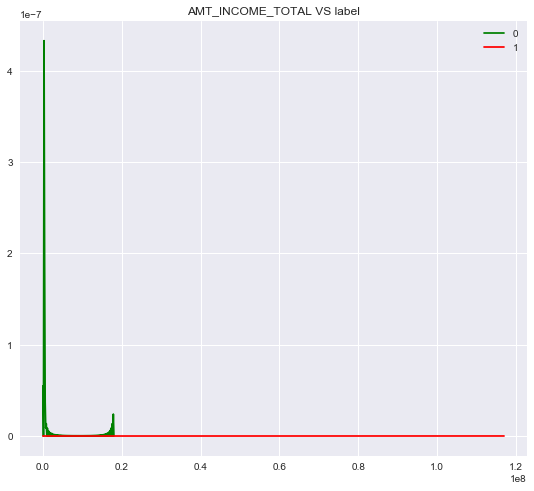

In [36]:
#show distribution AMT_INCOME_TOTAL in type of label
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.kdeplot(hc_train3[hc_train3["label"]==0]["AMT_INCOME_TOTAL"], label="0", color="green")
sns.kdeplot(hc_train3[hc_train3["label"]==1]["AMT_INCOME_TOTAL"], label="1", color="red")
plt.title("AMT_INCOME_TOTAL VS label")
#plt.subplot(122)
#hc_trains2_pd.groupby("label").AMT_INCOME_TOTAL.plot.density(alpha=0.5, legend=True, title="AMT_INCOME_TOTAL VS TARGET")
plt.show()

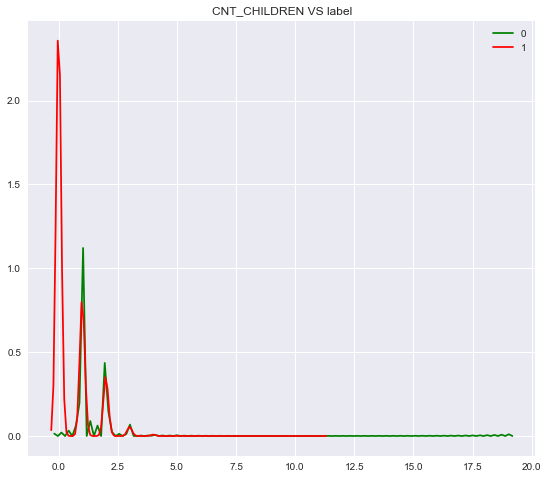

In [37]:
#show distribution CNT_CHILDREN in type of label
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.kdeplot(hc_train3[hc_train3["label"]==0]["CNT_CHILDREN"], label="0", color="green")
sns.kdeplot(hc_train3[hc_train3["label"]==1]["CNT_CHILDREN"], label="1", color="red")
plt.title("CNT_CHILDREN VS label")
plt.show()

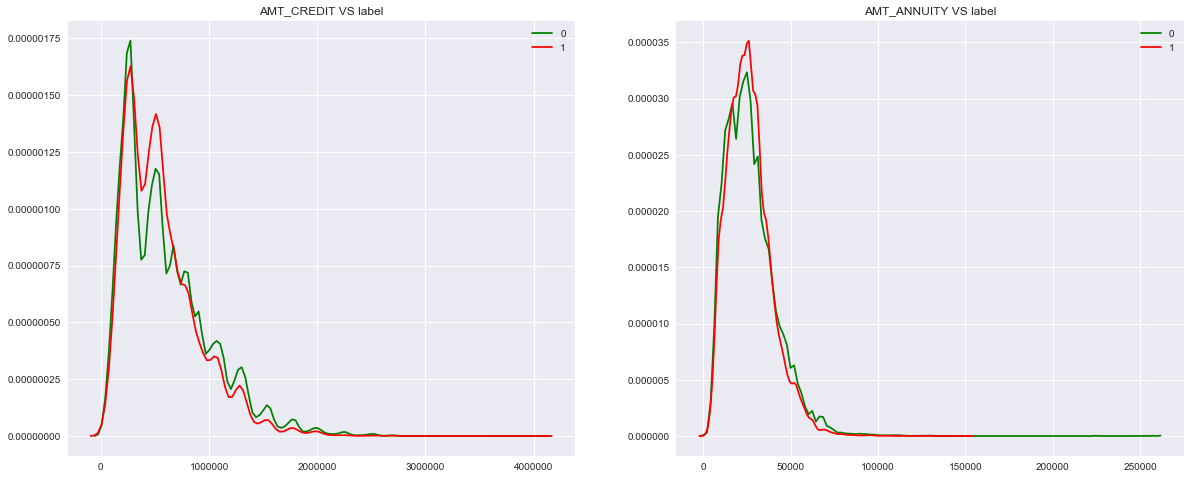

In [38]:
#show distribution AMT_CREDIT and AMT_ANNUITY in type of label
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.kdeplot(hc_train3[hc_train3["label"]==0]["AMT_CREDIT"], label="0", color="green")
sns.kdeplot(hc_train3[hc_train3["label"]==1]["AMT_CREDIT"], label="1", color="red")
plt.title("AMT_CREDIT VS label")
plt.subplot(122)
sns.kdeplot(hc_train3[hc_train3["label"]==0]["AMT_ANNUITY"], label="0", color="green")
sns.kdeplot(hc_train3[hc_train3["label"]==1]["AMT_ANNUITY"], label="1", color="red")
plt.title("AMT_ANNUITY VS label")
plt.show()

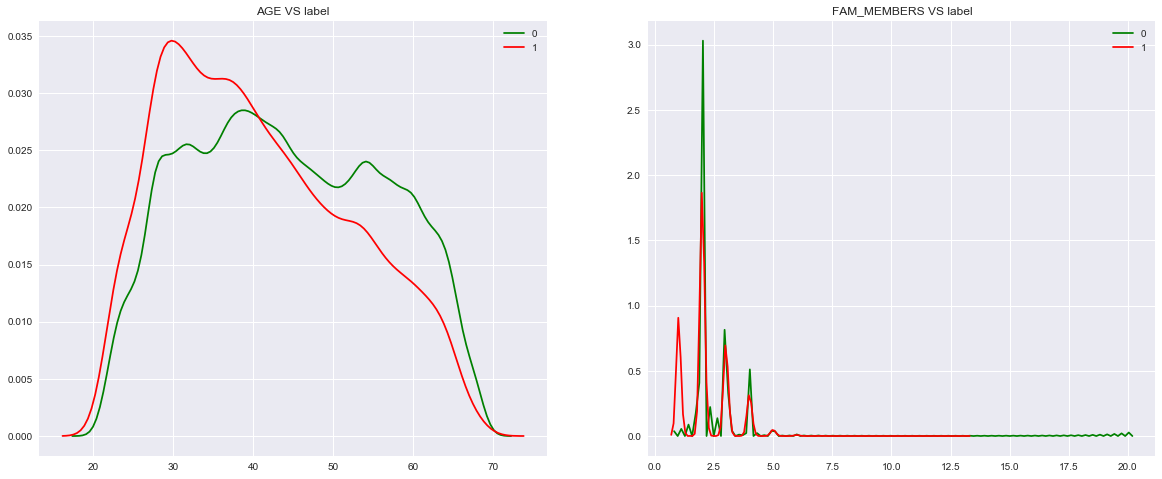

In [39]:
#show distribution DAYS_BIRTH and CNT_FAM_MEMBERS in type of label
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.kdeplot(hc_train3[hc_train3["label"]==0]["DAYS_BIRTH"]/-365, label="0", color="green")
sns.kdeplot(hc_train3[hc_train3["label"]==1]["DAYS_BIRTH"]/-365, label="1", color="red")
plt.title("AGE VS label")
plt.subplot(122)
sns.kdeplot(hc_train3[hc_train3["label"]==0]["CNT_FAM_MEMBERS"], label="0", color="green")
sns.kdeplot(hc_train3[hc_train3["label"]==1]["CNT_FAM_MEMBERS"], label="1", color="red")
plt.title("FAM_MEMBERS VS label")
plt.show()

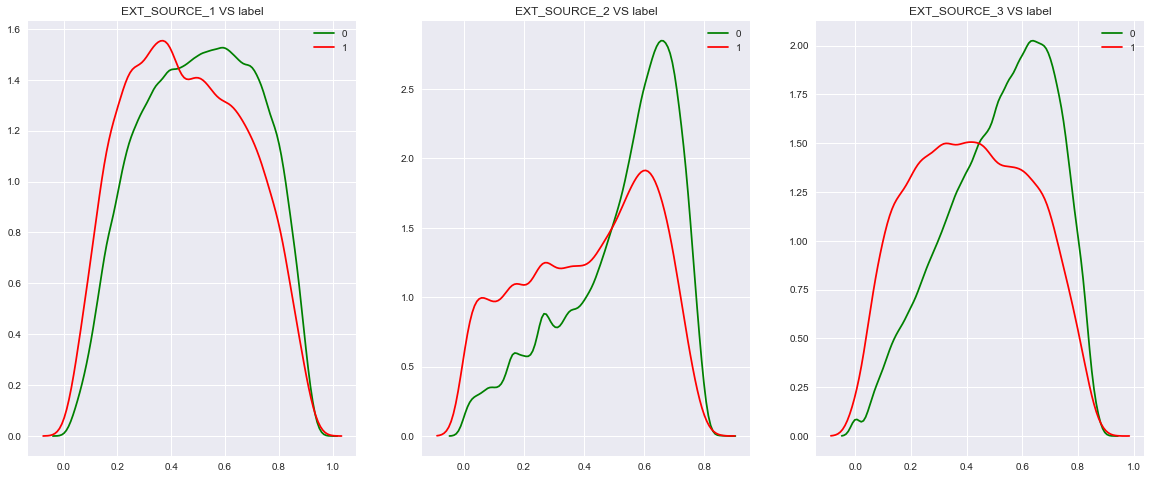

In [40]:
#show distribution EXT_SOURCE_1,2,3 in type of label
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.kdeplot(hc_train3[hc_train3["label"]==0]["EXT_SOURCE_1"], label="0", color="green")
sns.kdeplot(hc_train3[hc_train3["label"]==1]["EXT_SOURCE_1"], label="1", color="red")
plt.title("EXT_SOURCE_1 VS label")
plt.subplot(132)
sns.kdeplot(hc_train3[hc_train3["label"]==0]["EXT_SOURCE_2"], label="0", color="green")
sns.kdeplot(hc_train3[hc_train3["label"]==1]["EXT_SOURCE_2"], label="1", color="red")
plt.title("EXT_SOURCE_2 VS label")
plt.subplot(133)
sns.kdeplot(hc_train3[hc_train3["label"]==0]["EXT_SOURCE_3"], label="0", color="green")
sns.kdeplot(hc_train3[hc_train3["label"]==1]["EXT_SOURCE_3"], label="1", color="red")
plt.title("EXT_SOURCE_3 VS label")
plt.show()

### Checking outlier

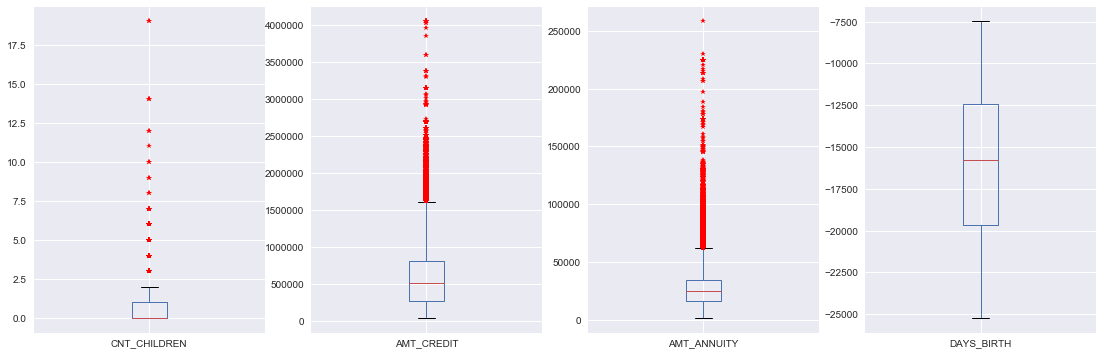

In [41]:
#Check Outlier
#Boxplot
plt.figure(figsize=(24,6))
#plt.subplot(151)
#hc_train3[["AMT_INCOME_TOTAL"]].boxplot(sym='b+', grid=True)
plt.subplot(152)
hc_train3[["CNT_CHILDREN"]].boxplot(sym='r*', grid=True)
plt.subplot(153)
hc_train3[["AMT_CREDIT"]].boxplot(sym='r*', grid=True)
plt.subplot(154)
hc_train3[["AMT_ANNUITY"]].boxplot(sym='r*', grid=True)
plt.subplot(155)
hc_train3[["DAYS_BIRTH"]].boxplot(sym='r*', grid=True)
plt.show()

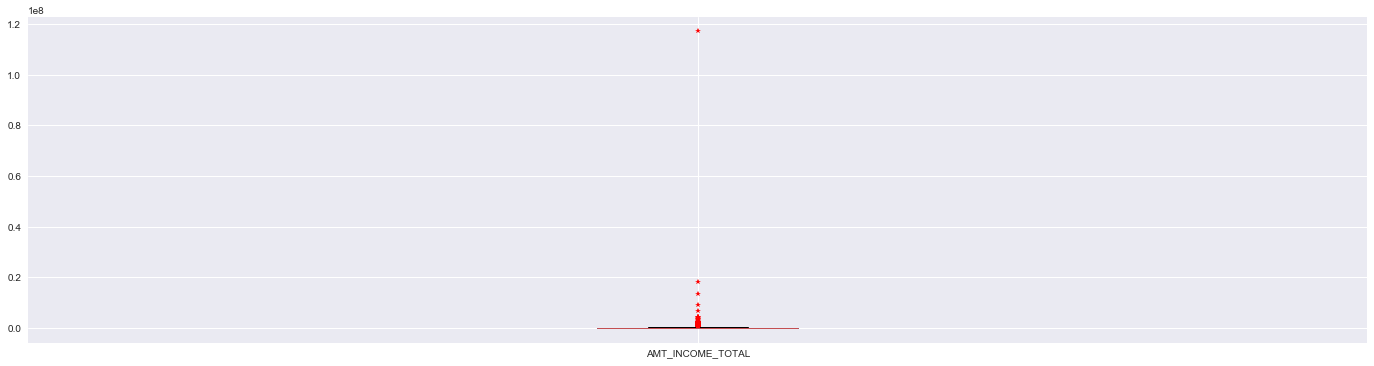

In [42]:
#Check Outlier
#Boxplot
plt.figure(figsize=(24,6))
#plt.subplot(151)
hc_train3[["AMT_INCOME_TOTAL"]].boxplot(sym='r*', grid=True)
plt.show()

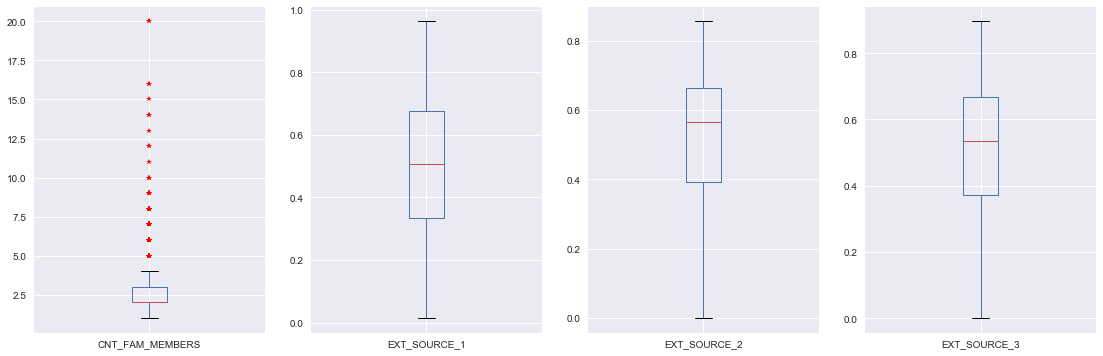

In [43]:
#Check Outlier
#Boxplot
plt.figure(figsize=(24,6))
#plt.subplot(151)
#hc_train3[["AMT_INCOME_TOTAL"]].boxplot(sym='b+', grid=True)
plt.subplot(152)
hc_train3[["CNT_FAM_MEMBERS"]].boxplot(sym='r*', grid=True)
plt.subplot(153)
hc_train3[["EXT_SOURCE_1"]].boxplot(sym='r*', grid=True)
plt.subplot(154)
hc_train3[["EXT_SOURCE_2"]].boxplot(sym='r*', grid=True)
plt.subplot(155)
hc_train3[["EXT_SOURCE_3"]].boxplot(sym='r*', grid=True)
plt.show()

### Handle of outlier

In [44]:
# We have 5 variable that have outlier and we will replace that outlier with value of upper side.
# Calculate quantile.
hc_train_describe =hc_train3[['CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'AMT_CREDIT','AMT_ANNUITY']].describe()
hc_train_describe

,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY
count,307511.000000,3.075110e+05,307511.000000,3.075110e+05,307511.000000
mean,2.152665,1.687979e+05,0.417052,5.990260e+05,27108.573909
std,0.910679,2.371231e+05,0.722121,4.024908e+05,14493.454517
min,1.000000,2.565000e+04,0.000000,4.500000e+04,1615.500000
25%,2.000000,1.125000e+05,0.000000,2.700000e+05,16524.000000
50%,2.000000,1.471500e+05,0.000000,5.135310e+05,24903.000000
75%,3.000000,2.025000e+05,1.000000,8.086500e+05,34596.000000
max,20.000000,1.170000e+08,19.000000,4.050000e+06,258025.500000


In [45]:
#calculate IQR & Upper side cnt_fam members
IQR_fam=hc_train_describe.iloc[6][0] - hc_train_describe.iloc[4][0]
upper_fam = hc_train_describe.iloc[6][0] + (IQR_fam*1.5)
print("upper_fam:" + str(upper_fam))

#calculate IQR & Upper side AMT_INCOME_TOTAL
IQR_income=hc_train_describe.iloc[6][1] - hc_train_describe.iloc[4][1]
upper_income = hc_train_describe.iloc[6][1] + (IQR_income*1.5)
print("upper_income:" + str(upper_income))

#calculate IQR & Upper side CNT_CHILDREN
IQR_child=hc_train_describe.iloc[6][2] - hc_train_describe.iloc[4][2]
upper_child = hc_train_describe.iloc[6][2] + (IQR_child*1.5)
print("upper_child:" + str(upper_child))

#calculate IQR & Upper side AMT_CREDIT
IQR_credit=hc_train_describe.iloc[6][3] - hc_train_describe.iloc[4][3]
upper_credit = hc_train_describe.iloc[6][3] + (IQR_credit*1.5)
print("upper_credit:" + str(upper_credit))

#calculate IQR & Upper side AMT_ANNUITY
IQR_annuity=hc_train_describe.iloc[6][4] - hc_train_describe.iloc[4][4]
upper_annuity = hc_train_describe.iloc[6][4] + (IQR_annuity*1.5)
print("upper_annuity:" + str(upper_annuity))



upper_fam:4.5
upper_income:337500.0
upper_child:2.5
upper_credit:1616625.0
upper_annuity:61704.0


In [46]:
#replace the outlier in CNT_FAM_MEMBERS
hc_train3.loc[hc_train3['CNT_FAM_MEMBERS']>4.5, 'CNT_FAM_MEMBERS']=4

#replace the outlier in AMT_INCOME_TOTAL
hc_train3.loc[hc_train3['AMT_INCOME_TOTAL']>337500.0, 'AMT_INCOME_TOTAL']=337500.0

#replace the outlier in CNT_CHILDREN
hc_train3.loc[hc_train3['CNT_CHILDREN']>2.5, 'CNT_CHILDREN']=2

#replace the outlier in AMT_CREDIT
hc_train3.loc[hc_train3['AMT_CREDIT']>1616625.0, 'AMT_CREDIT']=1616625.0

#replace the outlier in AMT_ANNUITY
hc_train3.loc[hc_train3['AMT_ANNUITY']>27109.0, 'AMT_ANNUITY']=27109.0



C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


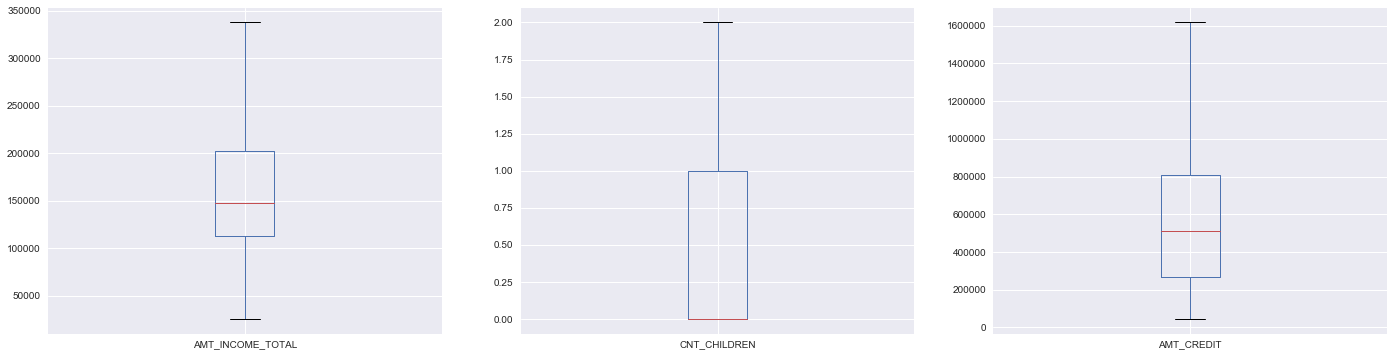

In [47]:
#check outlier after replaced by upperside
plt.figure(figsize=(24,6))
plt.subplot(131)
hc_train3[["AMT_INCOME_TOTAL"]].boxplot(sym='r*', grid=True)
plt.subplot(132)
hc_train3[["CNT_CHILDREN"]].boxplot(sym='r*', grid=True)
plt.subplot(133)
hc_train3[["AMT_CREDIT"]].boxplot(sym='r*', grid=True)
plt.show()

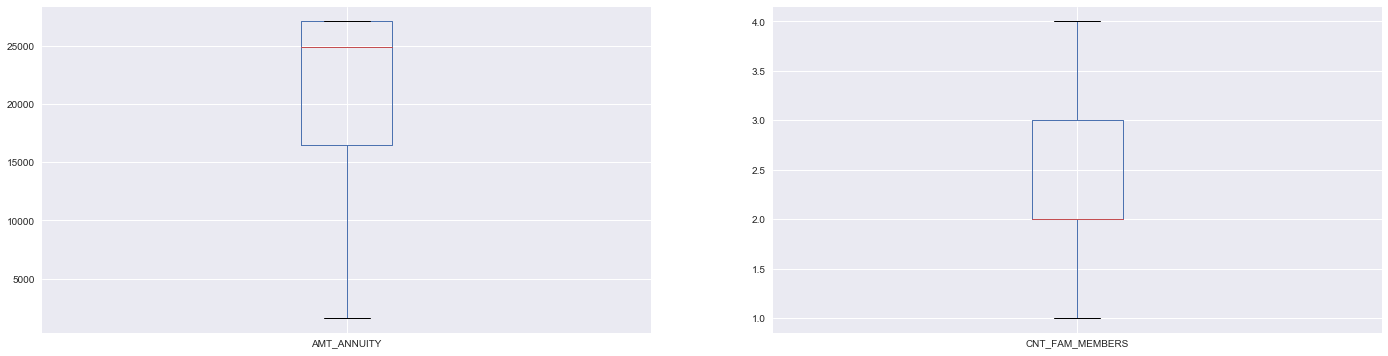

In [48]:
#check outlier after replaced by upperside
plt.figure(figsize=(24,6))
plt.subplot(121)
hc_train3[["AMT_ANNUITY"]].boxplot(sym='r*', grid=True)
plt.subplot(122)
hc_train3[["CNT_FAM_MEMBERS"]].boxplot(sym='r*', grid=True)
plt.show()

### Get Dummies for categorical variable

In [49]:
hc_train3_encoded=pd.get_dummies(hc_train3)


#kredit=pd.get_dummies(kredit, columns=['MARRIAGE', 'EDUCATION', 'SEX',], drop_first=bool)

In [50]:
hc_train3_encoded.head(4)

,SK_ID_CURR,label,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,OCCUPATION_Laborers,OCCUPATION_Low-skill Laborers,OCCUPATION_Managers,OCCUPATION_Medicine staff,OCCUPATION_Private service staff,OCCUPATION_Realty agents,OCCUPATION_Sales staff,OCCUPATION_Secretaries,OCCUPATION_Security staff,OCCUPATION_Waiters/barmen staff
0,100002,1,0,202500.0,406597.5,24700.5,-9461,1.0,0.083037,0.262949,...,1,0,0,0,0,0,0,0,0,0
1,100003,0,0,270000.0,1293502.5,27109.0,-16765,2.0,0.311267,0.622246,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,67500.0,135000.0,6750.0,-19046,1.0,0.311267,0.555912,...,1,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,27109.0,-19005,2.0,0.311267,0.650442,...,1,0,0,0,0,0,0,0,0,0


In [51]:
hc_train3_encoded.columns

Index(['SK_ID_CURR', 'label', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'CONTRACT_TYPE_Cash loans',
       'CONTRACT_TYPE_Revolving loans', 'GENDER_F', 'GENDER_M',
       'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'INCOME_TYPE_Commercial associate',
       'INCOME_TYPE_Pensioner', 'INCOME_TYPE_State servant',
       'INCOME_TYPE_Working', 'EDUCATION_Higher education',
       'EDUCATION_Incomplete higher',
       'EDUCATION_Secondary / secondary special', 'MARRIAGE_Civil marriage',
       'MARRIAGE_Married', 'MARRIAGE_Separated',
       'MARRIAGE_Single / not married', 'MARRIAGE_Widow',
       'HOUSING_TYPE_Co-op apartment', 'HOUSING_TYPE_House / apartment',
       'HOUSING_TYPE_Municipal apartment', 'HOUSING_TYPE_Office apartment',
       'HOUSING_TYPE_Rented apartment', 'HOUSING_TYPE_With parents',
       'OCCUPATION_Accountants', 'OCCUPATION_Cleaning staff',
       'OCCUPATI

### Split data train to train and test data

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
training_features, test_features, \
training_target, test_target, = train_test_split(hc_train3_encoded.drop(['label'], axis=1),
                                               hc_train3_encoded['label'],
                                               test_size = 0.30,
                                               random_state=12)

### Over sampling data train with SMOTE

In [54]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = 0.30,
                                                  random_state=12)

In [55]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


### Modelling

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

### Validation

In [58]:
from sklearn.metrics import recall_score

In [59]:
print('Validation Results')
print(clf_rf.score(x_val, y_val))
print(recall_score(y_val, clf_rf.predict(x_val)))


print('\nTest Results')
print(clf_rf.score(test_features, test_target))
print(recall_score(test_target, clf_rf.predict(test_features)))

Validation Results
0.9188423302053331
0.011229428848015489

Test Results
0.919027901229215
0.012454311628536618


In [60]:
clf_rf_pred =clf_rf.predict(test_features)

In [61]:
type(clf_rf_pred)

numpy.ndarray

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(confusion_matrix(test_target,clf_rf_pred))

[[84692   175]
 [ 7295    92]]


In [64]:
print(classification_report(test_target,clf_rf_pred))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     84867
          1       0.34      0.01      0.02      7387

avg / total       0.87      0.92      0.88     92254



In [65]:
clf_rf_pred_proba =clf_rf.predict_proba(test_features)

In [66]:
from sklearn.metrics import roc_auc_score

In [67]:
clf_rf_pred_proba1=pd.DataFrame(clf_rf_pred_proba)
clf_rf_pred_proba1=clf_rf_pred_proba1.iloc[:,1]

In [68]:
print( roc_auc_score(test_target, clf_rf_pred_proba1) )

0.6610948829832686


### Over sampling Data Train with resample

In [69]:
from sklearn.utils import resample

In [70]:

data_train=pd.concat([training_features,training_target], axis =1)

In [71]:
data_train.head(4)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,...,OCCUPATION_Low-skill Laborers,OCCUPATION_Managers,OCCUPATION_Medicine staff,OCCUPATION_Private service staff,OCCUPATION_Realty agents,OCCUPATION_Sales staff,OCCUPATION_Secretaries,OCCUPATION_Security staff,OCCUPATION_Waiters/barmen staff,label
297756,444957,1,225000.0,781920.0,27109.0,-14885,3.0,0.613124,0.609114,0.493863,...,0,0,0,0,1,0,0,0,0,0
82396,195560,0,180000.0,239850.0,25578.0,-8872,1.0,0.217608,0.578577,0.300108,...,0,0,0,0,0,0,0,0,0,0
299557,447041,2,148500.0,436032.0,27109.0,-12998,4.0,0.274607,0.122848,0.588488,...,0,0,0,0,0,0,0,0,0,0
187603,317478,0,225000.0,728460.0,27109.0,-21834,2.0,0.912271,0.722235,0.716570,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# Separate majority and minority classes
df_majority = data_train[data_train.label==0]
df_minority = data_train[data_train.label==1]

#Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=121000, random_state=123)

In [74]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [76]:
df_upsampled.label.value_counts()

0    197819
1    121000
Name: label, dtype: int64

#### Implement model on upsampled dataset

In [77]:
X=df_upsampled.drop('label', axis=1)
y=df_upsampled.label

In [88]:
#Train model
clf_upsampled=clf_rf.fit(X, y)

In [79]:
#make prediction proba

pred_upsampled_proba = clf_upsampled.predict_proba(X)

In [80]:
pred_upsampled_proba1=pd.DataFrame(pred_upsampled_proba)
pred_upsampled_proba1=pred_upsampled_proba1.iloc[:,1]

In [82]:
print( roc_auc_score(y, pred_upsampled_proba1) )

0.9999999998328885


In [83]:
#make prediction

pred_upsampled= clf_upsampled.predict(X)

In [84]:
print(confusion_matrix(y,pred_upsampled))

[[197819      0]
 [     5 120995]]


### Implementation on Test Dataset

In [96]:
#select columns
hc_test3=hc_test[['SK_ID_CURR','NAME_CONTRACT_TYPE','CODE_GENDER', 'FLAG_OWN_CAR','CNT_CHILDREN', 'AMT_INCOME_TOTAL',
                    'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                   'DAYS_BIRTH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]

In [97]:
#Rename Columns name
hc_test3.columns=['SK_ID_CURR', 'CONTRACT_TYPE', 'GENDER', 'FLAG_OWN_CAR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                  'AMT_ANNUITY','INCOME_TYPE', 'EDUCATION', 'MARRIAGE', 'HOUSING_TYPE', 'DAYS_BIRTH', 'OCCUPATION', 
                   'CNT_FAM_MEMBERS', 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']

In [98]:
hc_test3.head(5)

,SK_ID_CURR,CONTRACT_TYPE,GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,INCOME_TYPE,EDUCATION,MARRIAGE,HOUSING_TYPE,DAYS_BIRTH,OCCUPATION,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,100001,Cash loans,F,N,0,135000.0,568800.0,20560.5,Working,Higher education,Married,House / apartment,-19241,NaN,2.0,0.752614,0.789654,0.159520
1,100005,Cash loans,M,N,0,99000.0,222768.0,17370.0,Working,Secondary / secondary special,Married,House / apartment,-18064,Low-skill Laborers,2.0,0.564990,0.291656,0.432962
2,100013,Cash loans,M,Y,0,202500.0,663264.0,69777.0,Working,Higher education,Married,House / apartment,-20038,Drivers,2.0,NaN,0.699787,0.610991
3,100028,Cash loans,F,N,2,315000.0,1575000.0,49018.5,Working,Secondary / secondary special,Married,House / apartment,-13976,Sales staff,4.0,0.525734,0.509677,0.612704
4,100038,Cash loans,M,Y,1,180000.0,625500.0,32067.0,Working,Secondary / secondary special,Married,House / apartment,-13040,NaN,3.0,0.202145,0.425687,NaN


Check Missing Value

In [99]:
hc_test3.isnull().sum()

SK_ID_CURR              0
CONTRACT_TYPE           0
GENDER                  0
FLAG_OWN_CAR            0
CNT_CHILDREN            0
AMT_INCOME_TOTAL        0
AMT_CREDIT              0
AMT_ANNUITY            24
INCOME_TYPE             0
EDUCATION               0
MARRIAGE                0
HOUSING_TYPE            0
DAYS_BIRTH              0
OCCUPATION          15605
CNT_FAM_MEMBERS         0
EXT_SOURCE_1        20532
EXT_SOURCE_2            8
EXT_SOURCE_3         8668
dtype: int64

Fill Missing Value

In [100]:
#calculate AMT_ANNUITY mean
annuity_avgtest= hc_test3['AMT_ANNUITY'].mean()
print(annuity_avg)

#Fill na in AMT_ANNUITY with annuity_avg
hc_test3['AMT_ANNUITY'].fillna(annuity_avgtest, inplace=True)

29426.240209359607


C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [101]:
#check mode accupation
mode_acctest=hc_test3['OCCUPATION'].mode()
mode_acctest

#Fill na in OCCUPATION with mode_acc

hc_test3['OCCUPATION'].fillna('Laborers', inplace=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


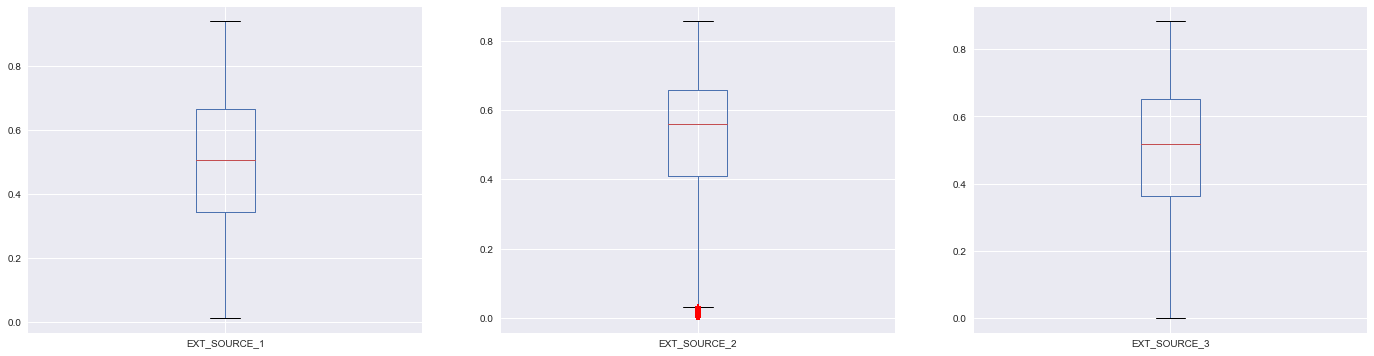

In [102]:
#check outlier in variable EXT_SOURCE1, EXT_SOURCE2, EXT_SOURCE3

plt.figure(figsize=(24,6))
plt.subplot(131)
hc_test3[['EXT_SOURCE_1']].boxplot(sym='r*', grid=True)
plt.subplot(132)
hc_test3[['EXT_SOURCE_2']].boxplot(sym='r*', grid=True)
plt.subplot(133)
hc_test3[['EXT_SOURCE_3']].boxplot(sym='r*', grid=True)
plt.show()

In [103]:
#fill missing value in EXT_SOURCE 1,2,3 with ffill method.
#fill missing value in EXT_SOURCE1
hc_test3['EXT_SOURCE_1'].fillna(method='ffill', inplace=True)
hc_test3['EXT_SOURCE_2'].fillna(method='ffill', inplace=True)
hc_test3['EXT_SOURCE_3'].fillna(method='ffill', inplace=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


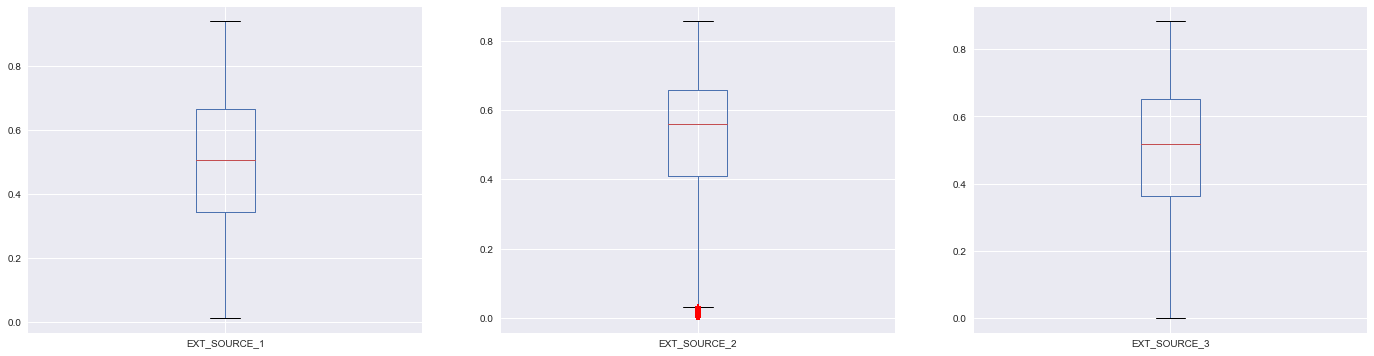

In [106]:
#check outlier in variable EXT_SOURCE1, EXT_SOURCE2, EXT_SOURCE3

plt.figure(figsize=(24,6))
plt.subplot(131)
hc_test3[['EXT_SOURCE_1']].boxplot(sym='r*', grid=True)
plt.subplot(132)
hc_test3[['EXT_SOURCE_2']].boxplot(sym='r*', grid=True)
plt.subplot(133)
hc_test3[['EXT_SOURCE_3']].boxplot(sym='r*', grid=True)
plt.show()

In [105]:
hc_test3.isnull().sum()

SK_ID_CURR          0
CONTRACT_TYPE       0
GENDER              0
FLAG_OWN_CAR        0
CNT_CHILDREN        0
AMT_INCOME_TOTAL    0
AMT_CREDIT          0
AMT_ANNUITY         0
INCOME_TYPE         0
EDUCATION           0
MARRIAGE            0
HOUSING_TYPE        0
DAYS_BIRTH          0
OCCUPATION          0
CNT_FAM_MEMBERS     0
EXT_SOURCE_1        0
EXT_SOURCE_2        0
EXT_SOURCE_3        0
dtype: int64

Handle lowest category

In [107]:

#replace lowest categories in EDUCATION variable with highest categories
hc_test3['EDUCATION'].replace('Lower secondary','Incomplete higher', inplace=True)
hc_test3['EDUCATION'].replace('Academic degree','Incomplete higher', inplace=True)

#replace lowest categories in INCOME_TYPE variable with highest categories
hc_test3['INCOME_TYPE'].replace('Unemployed','Pensioner', inplace=True)
hc_test3['INCOME_TYPE'].replace('Businessman','Working', inplace=True)
hc_test3['INCOME_TYPE'].replace('Student','Working', inplace=True)


C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [108]:
hc_test3.groupby('INCOME_TYPE')['SK_ID_CURR'].count()

INCOME_TYPE
Commercial associate    11402
Pensioner                9274
State servant            3532
Working                 24536
Name: SK_ID_CURR, dtype: int64

In [109]:
hc_test3.groupby('EDUCATION')['SK_ID_CURR'].count()

EDUCATION
Higher education                 12516
Incomplete higher                 2240
Secondary / secondary special    33988
Name: SK_ID_CURR, dtype: int64

Check and handle outlier

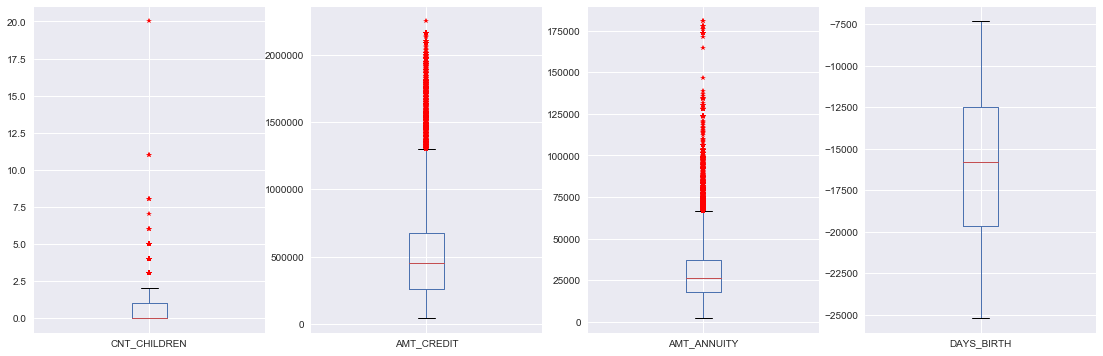

In [83]:
#Check Outlier
#Boxplot
plt.figure(figsize=(24,6))
#plt.subplot(151)
#hc_train3[["AMT_INCOME_TOTAL"]].boxplot(sym='b+', grid=True)
plt.subplot(152)
hc_test3[["CNT_CHILDREN"]].boxplot(sym='r*', grid=True)
plt.subplot(153)
hc_test3[["AMT_CREDIT"]].boxplot(sym='r*', grid=True)
plt.subplot(154)
hc_test3[["AMT_ANNUITY"]].boxplot(sym='r*', grid=True)
plt.subplot(155)
hc_test3[["DAYS_BIRTH"]].boxplot(sym='r*', grid=True)
plt.show()

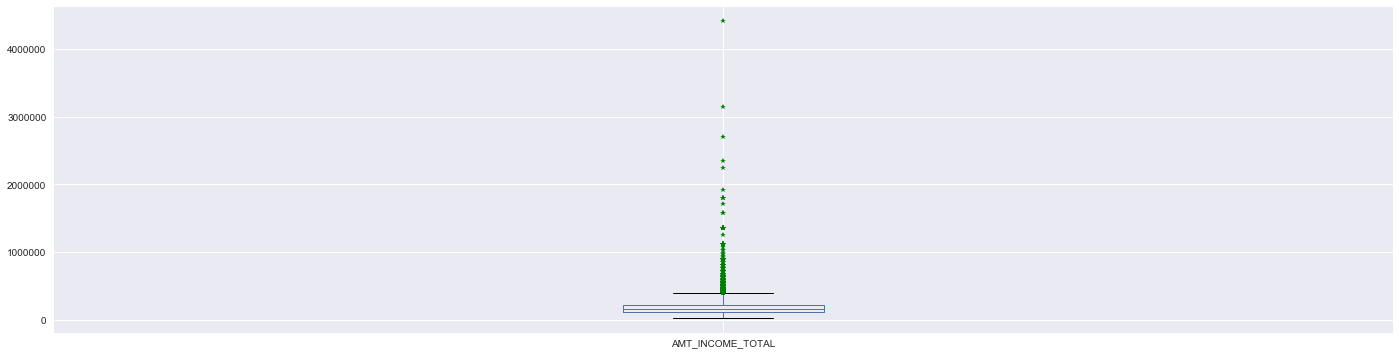

In [92]:
#Check Outlier
#Boxplot
plt.figure(figsize=(24,6))
#plt.subplot(151)
hc_test3[["AMT_INCOME_TOTAL"]].boxplot(sym='g-*', grid=True)
plt.show()

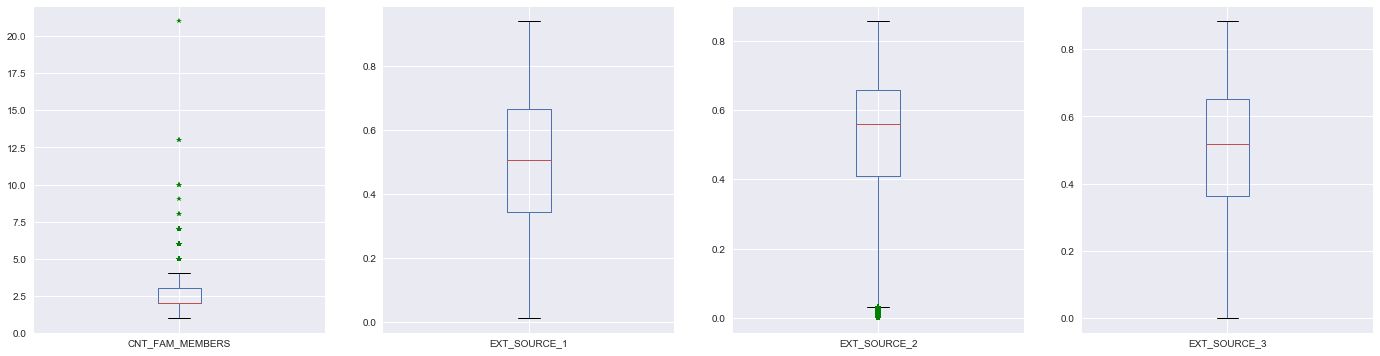

In [93]:
#Check Outlier
#Boxplot
plt.figure(figsize=(24,6))
#plt.subplot(151)
#hc_train3[["AMT_INCOME_TOTAL"]].boxplot(sym='b+', grid=True)
plt.subplot(141)
hc_test3[["CNT_FAM_MEMBERS"]].boxplot(sym='g-*', grid=True)
plt.subplot(142)
hc_test3[["EXT_SOURCE_1"]].boxplot(sym='g-*', grid=True)
plt.subplot(143)
hc_test3[["EXT_SOURCE_2"]].boxplot(sym='g-*', grid=True)
plt.subplot(144)
hc_test3[["EXT_SOURCE_3"]].boxplot(sym='g-*', grid=True)
plt.show()

In [111]:
# We have 5 variable that have outlier and we will replace that outlier with value of upper side.
# Calculate quantile.
hc_test3_describe =hc_test3[['CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'AMT_CREDIT','AMT_ANNUITY', 'EXT_SOURCE_2']].describe()
hc_test3_describe


,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,EXT_SOURCE_2
count,48744.000000,4.874400e+04,48744.000000,4.874400e+04,48744.000000,48744.000000
mean,2.146767,1.784318e+05,0.397054,5.167404e+05,29426.240209,0.518025
std,0.890423,1.015226e+05,0.709047,3.653970e+05,16012.424773,0.181271
min,1.000000,2.694150e+04,0.000000,4.500000e+04,2295.000000,0.000008
25%,2.000000,1.125000e+05,0.000000,2.606400e+05,17973.000000,0.408077
50%,2.000000,1.575000e+05,0.000000,4.500000e+05,26221.500000,0.558758
75%,3.000000,2.250000e+05,1.000000,6.750000e+05,37390.500000,0.658497
max,21.000000,4.410000e+06,20.000000,2.245500e+06,180576.000000,0.855000


In [116]:
#calculate IQR & Upper side cnt_fam members
IQR_famtest=hc_test3_describe.iloc[6][0] - hc_test3_describe.iloc[4][0]
upper_famtest = hc_test3_describe.iloc[6][0] + (IQR_famtest*1.5)
print("upper_fam:" + str(upper_famtest))

#calculate IQR & Upper side AMT_INCOME_TOTAL
IQR_incometest=hc_test3_describe.iloc[6][1] - hc_test3_describe.iloc[4][1]
upper_incometest = hc_test3_describe.iloc[6][1] + (IQR_incometest*1.5)
print("upper_income:" + str(upper_incometest))

#calculate IQR & Upper side CNT_CHILDREN
IQR_childtest=hc_test3_describe.iloc[6][2] - hc_test3_describe.iloc[4][2]
upper_childtest = hc_test3_describe.iloc[6][2] + (IQR_childtest*1.5)
print("upper_child:" + str(upper_childtest))

#calculate IQR & Upper side AMT_CREDIT
IQR_credittest=hc_test3_describe.iloc[6][3] - hc_test3_describe.iloc[4][3]
upper_credittest = hc_test3_describe.iloc[6][3] + (IQR_credittest*1.5)
print("upper_credit:" + str(upper_credittest))

#calculate IQR & Upper side AMT_ANNUITY
IQR_annuitytest=hc_test3_describe.iloc[6][4] - hc_test3_describe.iloc[4][4]
upper_annuitytest = hc_test3_describe.iloc[6][4] + (IQR_annuitytest*1.5)
print("upper_annuity:" + str(upper_annuitytest))

#calculate IQR & Lower side EXT_SOURCE_2
IQR_ext_source2test=hc_test3_describe.iloc[6][5] - hc_test3_describe.iloc[4][5]
lower_ext_source2test = hc_test3_describe.iloc[4][5] - (IQR_ext_source2test*1.5)
print("lower_ext_source2:" + str(lower_ext_source2test))


upper_fam:4.5
upper_income:393750.0
upper_child:2.5
upper_credit:1296540.0
upper_annuity:66516.75
lower_ext_source2:0.03244631697734418


In [119]:
#replace the outlier in CNT_FAM_MEMBERS
hc_test3.loc[hc_test3['CNT_FAM_MEMBERS']>4.5, 'CNT_FAM_MEMBERS']=4

#replace the outlier in AMT_INCOME_TOTAL
hc_test3.loc[hc_test3['AMT_INCOME_TOTAL']>393750.0, 'AMT_INCOME_TOTAL']=393750.0

#replace the outlier in CNT_CHILDREN
hc_test3.loc[hc_test3['CNT_CHILDREN']>2.5, 'CNT_CHILDREN']=2

#replace the outlier in AMT_CREDIT
hc_test3.loc[hc_test3['AMT_CREDIT']>1296540.0, 'AMT_CREDIT']=1296540.0

#replace the outlier in AMT_ANNUITY
hc_test3.loc[hc_test3['AMT_ANNUITY']>66516.75, 'AMT_ANNUITY']=66516.75



C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [118]:
#replace the outlier in EXT_SOURCE_2
hc_test3.loc[hc_test3['EXT_SOURCE_2']<lower_ext_source2test, 'AMT_ANNUITY']=lower_ext_source2test

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


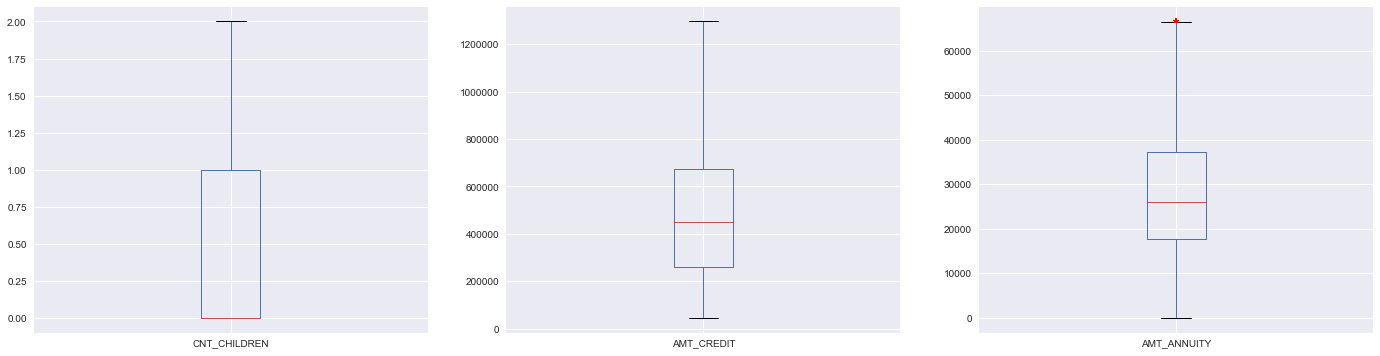

In [120]:
#Check Outlier after replacing
#Boxplot
plt.figure(figsize=(24,6))
plt.subplot(131)
hc_test3[["CNT_CHILDREN"]].boxplot(sym='r*', grid=True)
plt.subplot(132)
hc_test3[["AMT_CREDIT"]].boxplot(sym='r*', grid=True)
plt.subplot(133)
hc_test3[["AMT_ANNUITY"]].boxplot(sym='r*', grid=True)
plt.show()

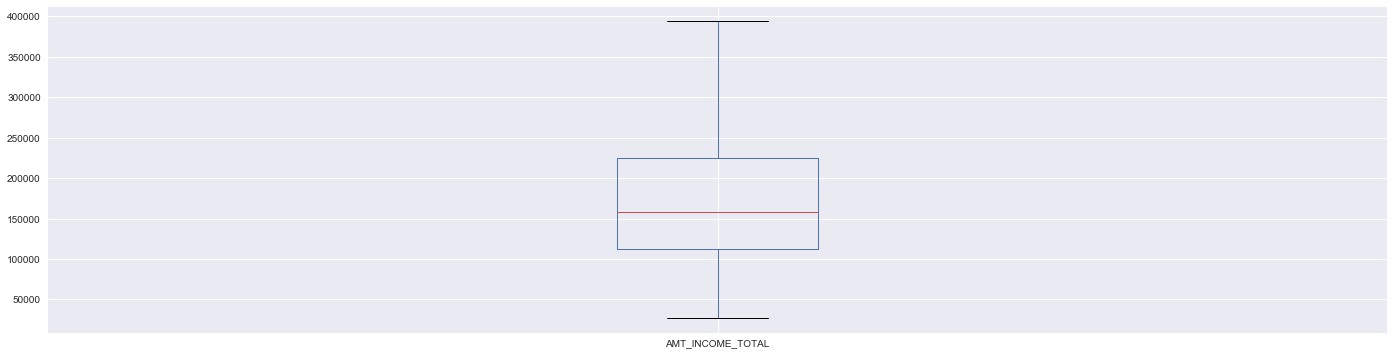

In [121]:
#Check Outlier after replacing
#Boxplot
plt.figure(figsize=(24,6))
hc_test3[["AMT_INCOME_TOTAL"]].boxplot(sym='g-*', grid=True)
plt.show()

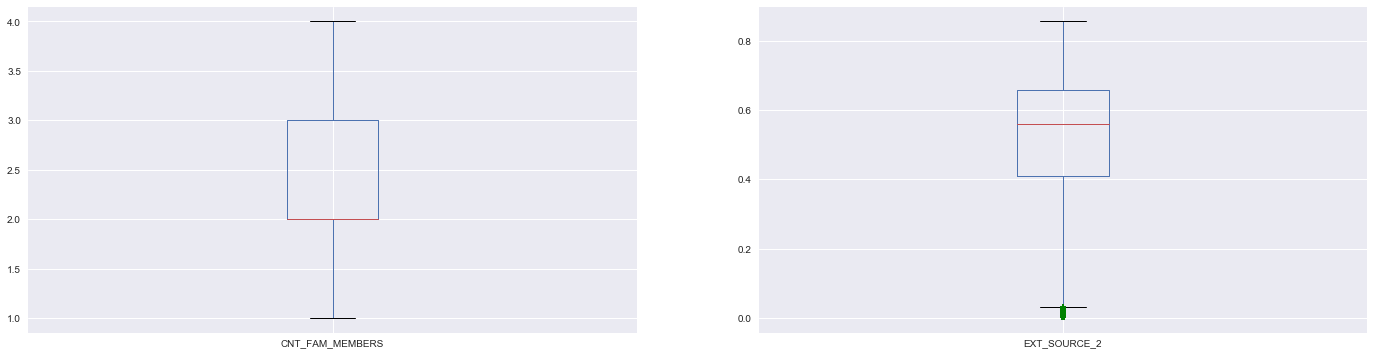

In [122]:
#Check Outlier after replacing
#Boxplot
plt.figure(figsize=(24,6))
#plt.subplot(151)
#hc_train3[["AMT_INCOME_TOTAL"]].boxplot(sym='b+', grid=True)
plt.subplot(121)
hc_test3[["CNT_FAM_MEMBERS"]].boxplot(sym='g-*', grid=True)
plt.subplot(122)
hc_test3[["EXT_SOURCE_2"]].boxplot(sym='g-*', grid=True)
plt.show()

### Get Dummies

In [127]:
hc_test3_encoded=pd.get_dummies(hc_test3)

In [131]:
type(hc_test3_encoded)

pandas.core.frame.DataFrame

### Making Prediction



In [135]:
prediction = clf_rf.predict_proba(hc_test3_encoded)


In [136]:
type(prediction)

numpy.ndarray

In [138]:
prediction=pd.DataFrame(prediction)
prediction.head(5)

,0,1
0,0.80,0.20
1,1.00,0.00
2,0.92,0.08
3,0.76,0.24
4,0.72,0.28


In [139]:
prediction1=prediction.iloc[:,1]
prediction1.head(5)

0    0.20
1    0.00
2    0.08
3    0.24
4    0.28
Name: 1, dtype: float64

In [141]:
my_prediction.tail(5)

,SK_ID_CURR,1
48739,456221,0.04
48740,456222,0.04
48741,456223,0.12
48742,456224,0.08
48743,456250,0.20


### Class Prediction

In [143]:
predictionClass = clf_rf.predict(hc_test3_encoded)

In [144]:
predictionClass=pd.DataFrame(predictionClass)
predictionClass.head(5)

,0
0,0
1,0
2,0
3,0
4,0


In [145]:
my_prediction=pd.concat([hc_test3['SK_ID_CURR'],prediction1, predictionClass], axis=1)
my_prediction.head(5)

,SK_ID_CURR,1,0
0,100001,0.20,0
1,100005,0.00,0
2,100013,0.08,0
3,100028,0.24,0
4,100038,0.28,0


In [146]:
#save data to csv

#my_prediction.to_csv('E:\Me\Assigment Probation\Dataset\myprediction.csv', index=False, header=True)

my_prediction.to_csv('E:\Me\Assigment Probation\Dataset\myprediction2.csv', index=False, header=True)